# Unveiling the Silent Killer: Predicting Stroke Incidence through Data Analysis and Machine Learning

By Tri Handayani

## Introduction

A stroke, also known as a brain attack, occurs when blood supply to part of the brain is blocked or when a blood vessel in the brain bursts. This leads to damage or death of parts of the brain, potentially causing lasting brain damage, long-term disability, or even death[1][2]. Strokes can be caused by a clot obstructing blood flow to the brain (ischemic stroke) or by a blood vessel rupturing and preventing blood flow (hemorrhagic stroke) [2]. Strokes are a leading cause of death and disability in the United States[2]. The term "stroke" comes from the idea that someone had received a "stroke of God's hand" and was therefore damaged[3]. While strokes can be lethal, many people do survive them, although they may experience emotional and physical challenges during recovery[4].

The risk factors for stroke can be categorized into two types: modifiable and non-modifiable. Modifiable risk factors are those that can be treated or controlled, while non-modifiable risk factors are those that cannot be changed. Here are some of the common risk factors for stroke:

Modifiable Risk Factors:

1. High blood pressure: Hypertension is the leading risk factor for stroke. It can damage blood vessels and increase the risk of blood clots[5][6][7][8].

2. Smoking: Smoking damages blood vessels and increases the risk of blood clots, making it a significant risk factor for stroke[5][6].

3. High cholesterol: High levels of cholesterol can lead to the buildup of plaque in the arteries, increasing the risk of stroke[6][7].

4. Diabetes: Diabetes can damage blood vessels and increase the risk of stroke[6][7].

5. Obesity: Being overweight or obese increases the risk of stroke, as it is often associated with other risk factors such as high blood pressure, high cholesterol, and diabetes[6][8].

6. Physical inactivity: Not engaging in regular physical activity can contribute to the development of other risk factors for stroke, such as obesity, high blood pressure, high cholesterol, and diabetes[6][8].


Non-Modifiable Risk Factors:

1. Age: The risk of stroke increases with age, with the majority of strokes occurring in people over the age of 65[7][9].

2. Gender: Men have a slightly higher risk of stroke than women, although stroke can affect both sexes[9].

3. Family history: Having a family history of stroke or certain genetic conditions can increase the risk of stroke[8][9].

4. Race/ethnicity: Certain racial and ethnic groups, such as African Americans, have a higher risk of stroke[9].

In this project, we embark on a journey to leverage data analysis and machine learning techniques to predict stroke incidence accurately.

The dataset used for this project was obtained from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset, and it contains a comprehensive set of features, including demographic information, medical history, lifestyle factors, and clinical measurements. Our goal is to explore this dataset, gain insights into the factors contributing to stroke incidence, and develop predictive models to aid in stroke risk assessment.

The project begins with data cleaning and preprocessing, where we address missing values, handle categorical variables, and perform necessary transformations. Next, we delve into exploratory data analysis to understand the distribution and relationships between variables. We categorize cardiovascular conditions into three categories based on hypertension, heart disease, or a combination of both, enabling us to analyze the impact of various factors on stroke incidence within each category.

We uncover intriguing findings during our analysis. In the category with multiple cardiovascular conditions, we observe no significant relationship between the variables and stroke incidence. However, in categories with either hypertension or heart disease alone, we identify key variables such as age and average glucose level that display a significant association with stroke incidence. Moreover, in the absence of any cardiovascular condition, variables like age, average glucose level, body mass index (BMI), and smoking status exhibit significant relationships with stroke incidence.

To harness these insights and build predictive models, we employ various machine learning algorithms, including logistic regression, random forest, decision tree, and support vector machines. Despite achieving high accuracy during model training and testing, we encounter challenges in precision, recall, and other evaluation metrics. As a result, we explore techniques such as oversampling, undersampling, and synthetic minority oversampling technique (SMOTE) to balance the imbalanced data. However, even after retraining and retesting the models, we find the results unsatisfactory, suggesting the complexity of the relationship between the predictors and stroke incidence.

This project serves as a comprehensive exploration of stroke prediction through data analysis and machine learning. By understanding the limitations and challenges encountered along the way, we gain valuable insights into the intricate nature of stroke incidence prediction. Through continued research and exploration, we strive to improve upon existing models and contribute to the development of more accurate and reliable stroke risk assessment tools.

Stay tuned as we unravel the mysteries behind stroke incidence and work towards a healthier future for all.

## Load the Dataset

In [1]:
import pandas as pd

# Load the dataset from a CSV file
dataset_path = 'healthcare-dataset-stroke-data.csv'  

# Read the dataset into a DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Cleaning

In [2]:
# Check for missing values
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
# Fill missing values in 'bmi' column with the mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

## Data Exploration

In [4]:
# Get information about the dataset
df.info()

# Statistical summary of the numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data Visualization

### Distribution of Age

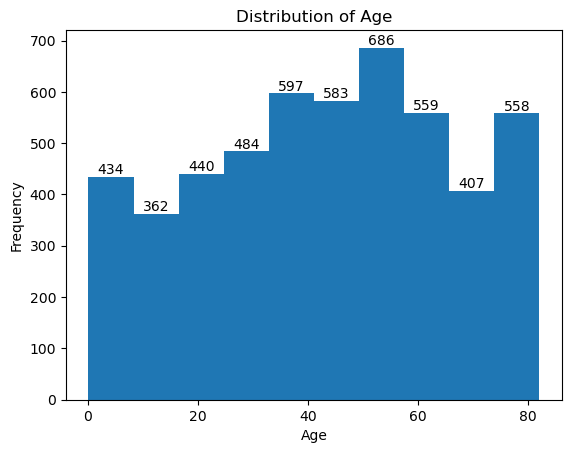

In [6]:
import matplotlib.pyplot as plt

counts, bins, _ = plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Add data labels
for i in range(len(counts)):
    plt.text(bins[i] + (bins[i+1] - bins[i])/2, counts[i], str(int(counts[i])), ha='center', va='bottom')

plt.show()


Based on the histogram, the age range of 42-56 has the highest frequency or count, with 686 individuals falling within that age group.

### Average Glucose Level vs BMI

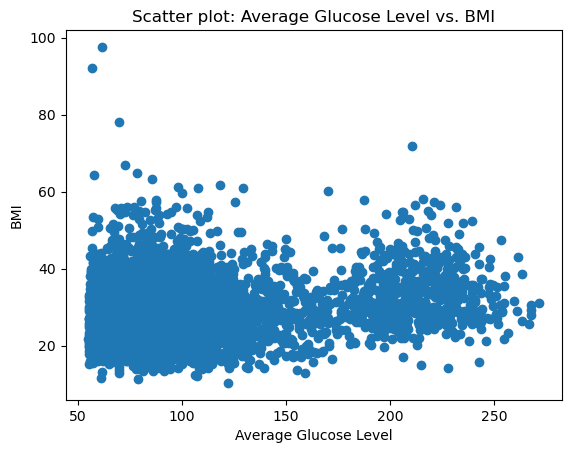

In [7]:
plt.scatter(df['avg_glucose_level'], df['bmi'])
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.title('Scatter plot: Average Glucose Level vs. BMI')

plt.show()

The scatter plot of average glucose level vs BMI shows that the majority of individuals have an average glucose level between 50-150 and a BMI between 10-50. This indicates that most individuals in the dataset have relatively normal glucose levels and a wide range of BMI values.

Additionally, there appears to be a second group of individuals with higher average glucose levels, ranging from 170-250, and slightly higher BMI values between 25-45. This group may represent individuals with higher glucose levels and potentially a higher risk of health complications related to glucose metabolism.

### Gender Distribution

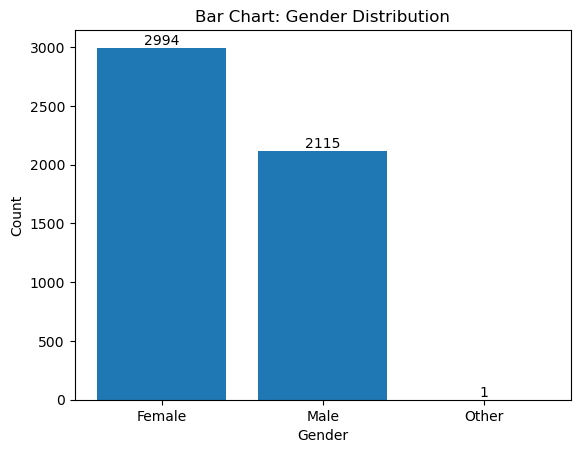

In [8]:
gender_counts = df['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Chart: Gender Distribution')

# Add data labels
for i in range(len(gender_counts)):
    plt.text(i, gender_counts[i], str(gender_counts[i]), ha='center', va='bottom')

plt.show()

Based on the gender distribution in the dataset, there are 2994 females, 2115 males, and 1 entry categorized as "Other". This indicates that the majority of individuals in the dataset are female, followed by males. 

## Feature Engineering

### Combine Existing Features

In [166]:
df['total_cardio_conditions'] = df['hypertension'] + df['heart_disease']


### Exploratory Data Analysis

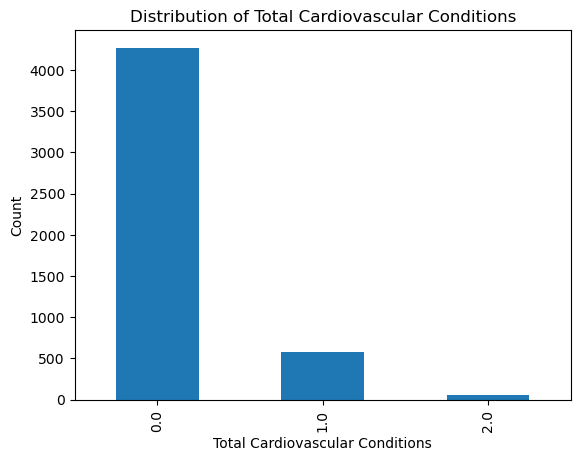

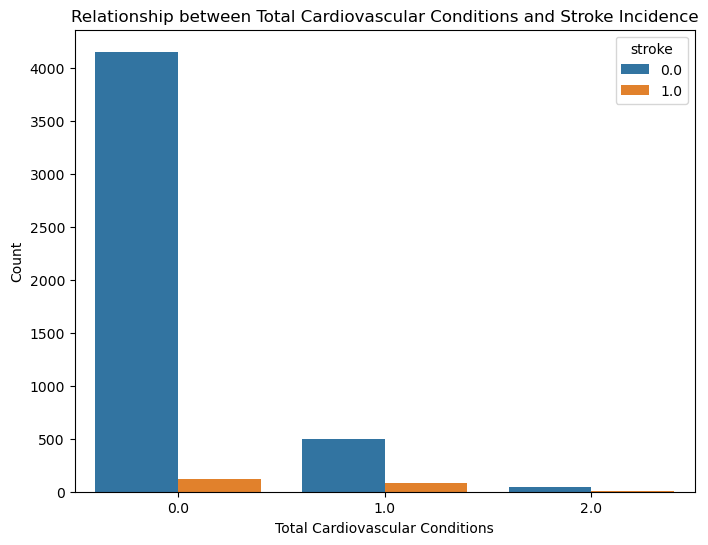

In [167]:
import matplotlib.pyplot as plt

# Distribution of total_cardio_conditions
ax = df['total_cardio_conditions'].value_counts().plot(kind='bar')
plt.xlabel('Total Cardiovascular Conditions')
plt.ylabel('Count')
plt.title('Distribution of Total Cardiovascular Conditions')
plt.show()

# Relationship between total_cardio_conditions and stroke incidence
plt.figure(figsize=(8, 6))
sns.countplot(x='total_cardio_conditions', hue='stroke', data=df)
plt.xlabel('Total Cardiovascular Conditions')
plt.ylabel('Count')
plt.title('Relationship between Total Cardiovascular Conditions and Stroke Incidence')
plt.show()


It's interesting to note that the majority of individuals fall into category 0, indicating no cardiovascular conditions. Category 1 refers to individuals who have only one cardiovascular condition, either hypertension or heart disease. Category 2 refers to individuals who have both hypertension and heart disease. The count of 64 individuals in category 2 suggests that there is a small subset of the population in the dataset who have both hypertension and heart disease (multiple cardiovascular conditions). 

### Category 2 Data Exploration

In [18]:
# subset the dataset containing only the individuals with multiple cardiovascular conditions (category 2) 
subset = df[df['total_cardio_conditions'] == 2]

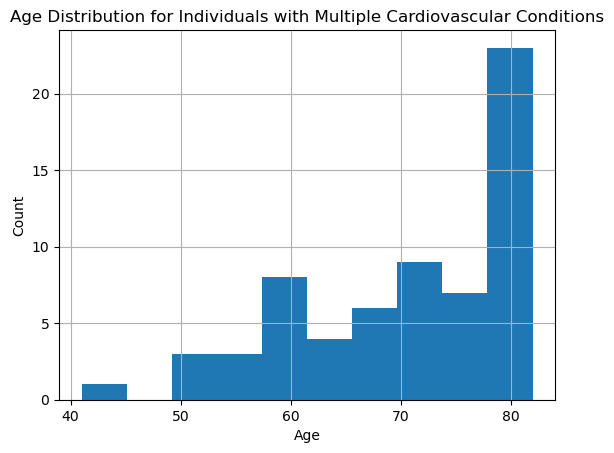

In [19]:
# Perform EDA on the subset
# Age distribution
subset['age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution for Individuals with Multiple Cardiovascular Conditions')

plt.show()

The majority of individuals with multiple cardiovascular conditions are aged 80. This insight gives us an understanding of the age group that is more prone to having multiple cardiovascular conditions.

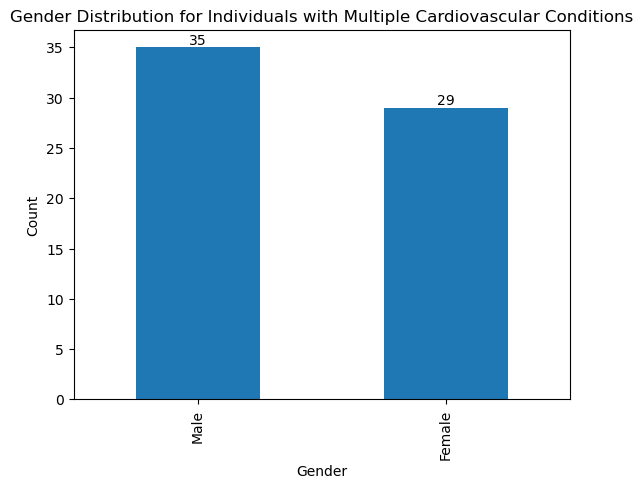

In [20]:
# Gender distribution
subset['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution for Individuals with Multiple Cardiovascular Conditions')

# Add data labels
for i, count in enumerate(subset['gender'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')


It appears that out of the 64 individuals, 35 are males and 29 are females. This insight gives us a glimpse into the gender distribution within this subgroup, highlighting a slightly higher prevalence among males.

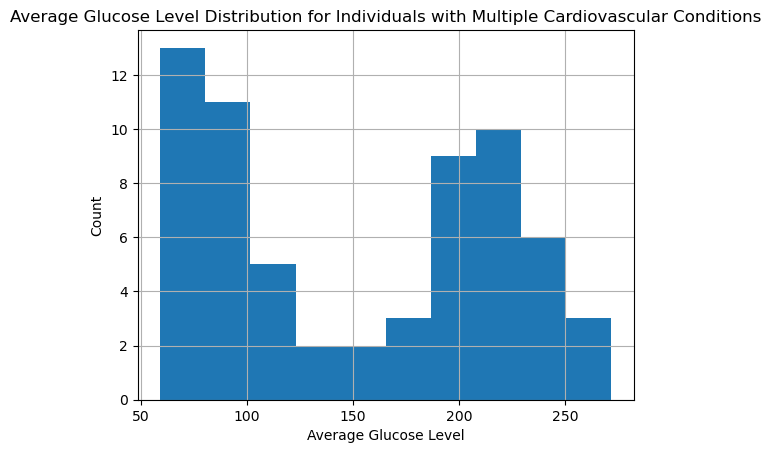

In [21]:
# Average glucose level distribution
subset['avg_glucose_level'].hist()
plt.xlabel('Average Glucose Level')
plt.ylabel('Count')
plt.title('Average Glucose Level Distribution for Individuals with Multiple Cardiovascular Conditions')

plt.show()

Based on the data, we can see that:

13 individuals have an average glucose level in the range of 60-80.
11 individuals have an average glucose level in the range of 80-100.
10 individuals have an average glucose level in the range of 210-230.
9 individuals have an average glucose level in the range of 190-210.
This information provides insights into the distribution of average glucose levels within this subgroup, highlighting the different ranges in which individuals with multiple cardiovascular conditions fall.

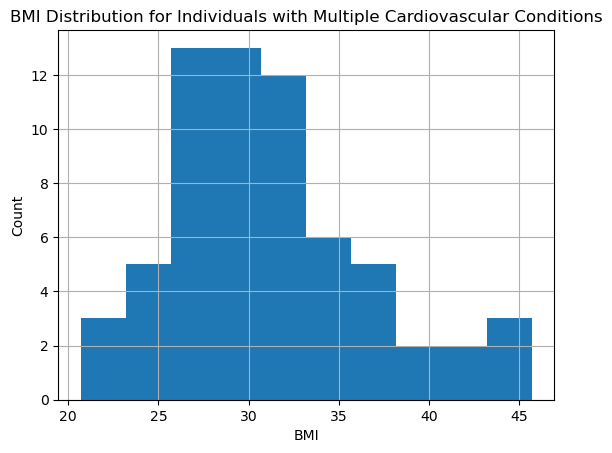

In [22]:
# BMI distribution
subset['bmi'].hist()
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution for Individuals with Multiple Cardiovascular Conditions')

plt.show()

Based on BMI distribution among individuals with multiple cardiovascular conditions, 13 individuals have a BMI in the range of 26-31, and 12 individuals have a BMI in the range of 31-33.

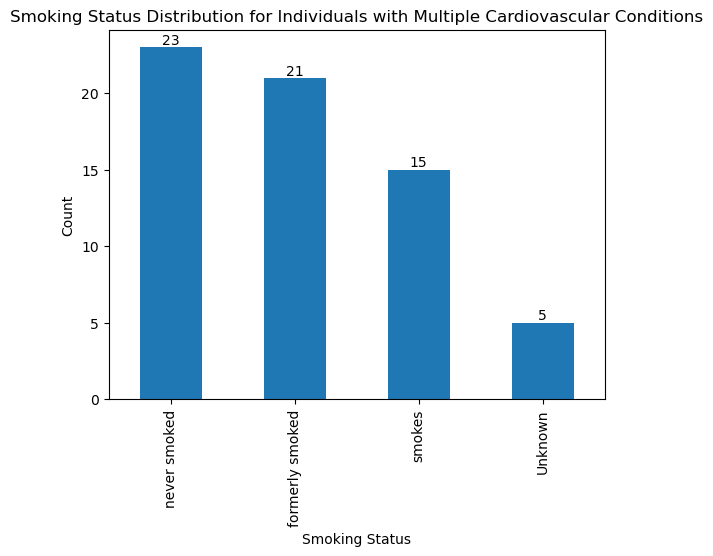

In [23]:
# Smoking status distribution
subset['smoking_status'].value_counts().plot(kind='bar')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Smoking Status Distribution for Individuals with Multiple Cardiovascular Conditions')

# Add data labels
for i, count in enumerate(subset['smoking_status'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

Smoking status distribution among individuals with multiple cardiovascular conditions: 23 individuals have never smoked. 21 individuals are former smokers. 15 individuals are current smokers. 5 individuals have an unknown smoking status.
This information helps us understand the smoking habits of individuals with multiple cardiovascular conditions, with a significant number of individuals having never smoked or being former smokers.

Based on the findings from the analysis of individuals with multiple cardiovascular conditions, we can draw the following conclusions:

1. Age Distribution: The majority of individuals with multiple cardiovascular conditions in the dataset are aged 80, indicating that older individuals may be more prone to developing multiple cardiovascular conditions.

2. Gender Distribution: Among individuals with multiple cardiovascular conditions, there are 35 males and 29 females. This suggests that both genders are affected by the presence of multiple cardiovascular conditions, with a slightly higher representation of males in this particular subset.

3. Average Glucose Level: The distribution of average glucose levels among individuals with multiple cardiovascular conditions shows varying ranges, with 13 individuals having levels between 60-80, 11 individuals between 80-100, 10 individuals between 210-230, and 9 individuals between 190-210. This indicates that there is a diverse range of glucose levels within this group.

4. BMI Distribution: The BMI distribution shows that the majority of individuals with multiple cardiovascular conditions have BMI in the range of 26-31, followed by 12 individuals with BMI in the range of 31-33. This suggests that there may be a correlation between higher BMI and the presence of multiple cardiovascular conditions.

5. Smoking Status: The smoking status distribution reveals that 23 individuals with multiple cardiovascular conditions have never smoked, 21 individuals are former smokers, 15 individuals are current smokers, and 5 individuals have an unknown smoking status. This highlights the importance of considering smoking habits as a potential risk factor for individuals with multiple cardiovascular conditions.

Overall, these findings provide insights into the characteristics and potential impact of having multiple cardiovascular conditions. They suggest that age, gender, average glucose level, BMI, and smoking status are factors that may be associated with the presence of multiple cardiovascular conditions.

### Connect the findings to stroke incidence for individuals with multiple cardiovascular conditions

In [24]:
# Create a subset of individuals with multiple cardiovascular conditions
df_subset = df[df['total_cardio_conditions'] == 2]

# Calculate stroke incidence rate
stroke_incidence_rate = len(df_subset[df_subset['stroke'] == 1]) / len(df_subset) * 100
print("Stroke Incidence Rate: {:.2f}%".format(stroke_incidence_rate))

Stroke Incidence Rate: 20.31%


With a stroke incidence rate of 20.31% among individuals with multiple cardiovascular conditions, it suggests that there is a relatively high likelihood of experiencing a stroke in this particular subgroup. This finding highlights the importance of managing and monitoring cardiovascular conditions in order to mitigate the risk of stroke.

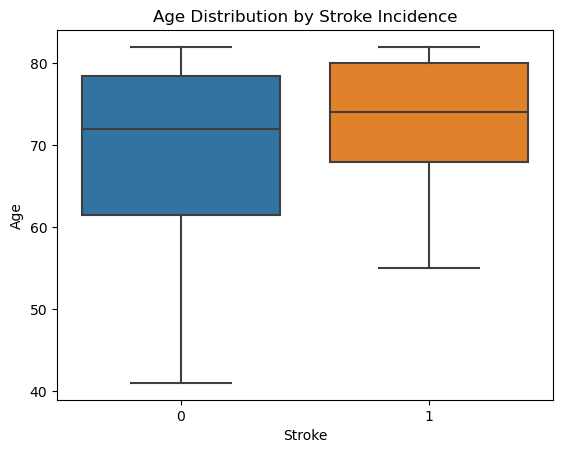

In [25]:
# Explore Relationships with Other Variables
# Relationship between age and stroke incidence
sns.boxplot(x='stroke', y='age', data=df_subset)
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.title('Age Distribution by Stroke Incidence')
plt.show()

These findings suggest that individuals with stroke among those with multiple cardiovascular conditions tend to have higher age distributions compared to those without stroke. The median age for individuals with stroke is 75, while the median age for those without stroke is 72. This indicates that age could be a contributing factor in the occurrence of stroke among individuals with multiple cardiovascular conditions.

To further analyze the relationship between age and stroke incidence, I consider conducting statistical tests or visualizations to assess the significance of age as a predictor for stroke occurrence. Based on the age distribution by stroke incidence among individuals with multiple cardiovascular conditions, where the data is not normally distributed, it is more appropriate to use the Mann-Whitney U test.

The Mann-Whitney U test is a non-parametric test that does not assume a specific distribution of the data and can handle non-normal data. It is suitable for comparing the distributions of two independent groups (in this case, individuals with stroke and individuals without stroke) based on a continuous variable (age).

The output will provide the test statistic and p-value. The p-value will indicate whether there is a significant difference in age between the two groups.

In [26]:
import scipy.stats as stats

# Subset the data for individuals with multiple cardiovascular conditions and stroke
subset_stroke = df_subset[df_subset['stroke'] == 1]
subset_no_stroke = df_subset[df_subset['stroke'] == 0]

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(subset[subset['stroke'] == 1]['age'],
                                        subset[subset['stroke'] == 0]['age'])

# Print the results
print("Mann-Whitney U Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U Test:
Statistic: 383.0
p-value: 0.3941104618146014


Based on the Mann-Whitney U test results, the statistic value is 383.0 and the p-value is 0.3941. In this case, the p-value (0.3941) is greater than 0.05, suggesting that there is no significant difference in ages between individuals with stroke and without stroke within the subset. Therefore, based on this test, age may not be a significant factor related to stroke incidence among individuals with multiple cardiovascular conditions.

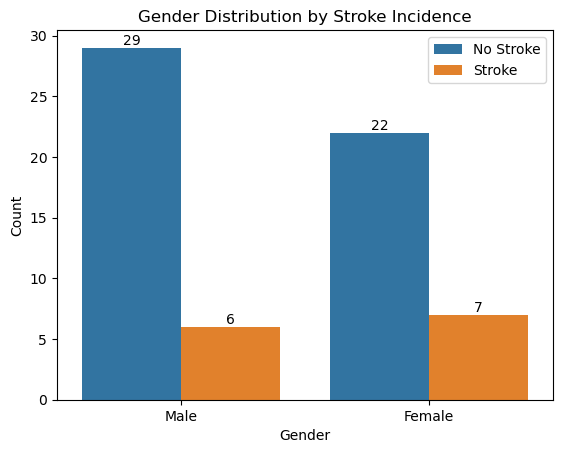

In [27]:
# Relationship between gender and stroke incidence
ax = sns.countplot(x='gender', hue='stroke', data=df_subset)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution by Stroke Incidence')
plt.legend(['No Stroke', 'Stroke'])

# Add data labels
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


Based on the visualization:

Relationship between gender and stroke incidence: 29 males without stroke, 6 males with stroke, 22 females without stroke, and 7 females with stroke. Next, I will conduct further analysis to examine the relationship between gender and stroke incidence using a statistical test. Since the variables are categorical (gender and stroke), I will use the chi-square test of independence. This test assesses whether there is a significant association between two categorical variables.

In [28]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_subset['gender'], df_subset['stroke'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("p-value:", p_value)

Chi-square test statistic: 0.14465372355838887
p-value: 0.7036977225641783


The chi-square test results for the relationship between gender and stroke incidence are as follows:

Chi-square test statistic: 0.14465372355838887 p-value: 0.7036977225641783 The chi-square test statistic measures the strength of the association between gender and stroke incidence. In this case, the test statistic is 0.14465372355838887.

The p-value, on the other hand, represents the probability of observing the data if there is no association between gender and stroke incidence. In this case, the p-value is 0.7036977225641783.

Since the p-value is greater than the chosen significance level (e.g., 0.05), we fail to reject the null hypothesis. This suggests that there is insufficient evidence to conclude a significant association between gender and stroke incidence in the subset of individuals with multiple cardiovascular conditions.

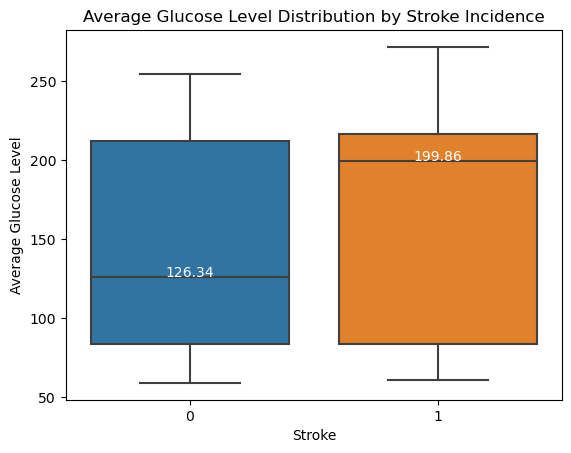

In [29]:
# Relationship between average glucose level and stroke incidence
ax = sns.boxplot(x='stroke', y='avg_glucose_level', data=df_subset)
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.title('Average Glucose Level Distribution by Stroke Incidence')

# Add data labels
medians = df_subset.groupby('stroke')['avg_glucose_level'].median()
pos = range(len(medians))
for p, median in zip(pos, medians):
    ax.text(p, median, str(round(median, 2)), color='white', ha="center")

plt.show()

In this case, we can observe that the median average glucose level for individuals without stroke is approximately 126.34, while for individuals with stroke, it is approximately 199.86. This suggests a potential difference in average glucose levels between the two groups, which can be further explored using statistical tests. To perform a statistical test to examine the relationship between average glucose level and stroke incidence, we can use an independent samples t-test.

In [30]:
import scipy.stats as stats

# Subset the data for individuals without stroke
df_no_stroke = df_subset[df_subset['stroke'] == 0]

# Subset the data for individuals with stroke
df_stroke = df_subset[df_subset['stroke'] == 1]

# Perform t-test
t_statistic, p_value = stats.ttest_ind(df_no_stroke['avg_glucose_level'], df_stroke['avg_glucose_level'])

# Print the results
print("T-Statistic:", t_statistic)
print("p-value:", p_value)


T-Statistic: -1.0110443807143739
p-value: 0.31592473880631794


The t-test results indicate that there is no significant difference in average glucose levels between individuals without stroke and those with stroke (p-value = 0.316). The negative t-statistic suggests that, on average, individuals with stroke have slightly lower average glucose levels compared to those without stroke, but this difference is not statistically significant.

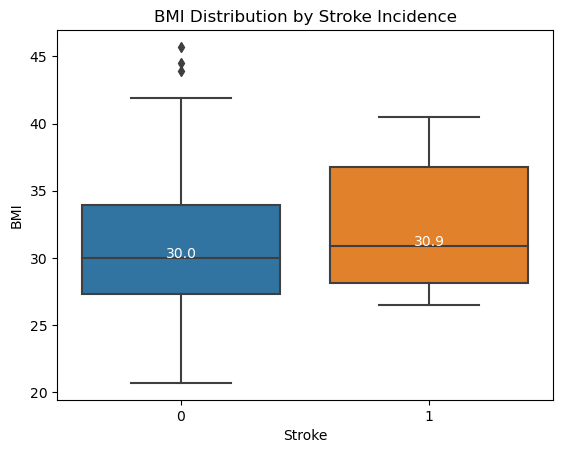

In [31]:
# Relationship between BMI and stroke incidence
ax = sns.boxplot(x='stroke', y='bmi', data=df_subset)
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.title('BMI Distribution by Stroke Incidence')

# Add data labels
medians = df_subset.groupby('stroke')['bmi'].median()
pos = range(len(medians))
for p, median in zip(pos, medians):
    ax.text(p, median, str(round(median, 2)), color='white', ha="center")

plt.show()

It seems that there is a slight difference in the median BMI between the two groups. However, to determine whether this difference is statistically significant, we can perform a statistical test.

Let's conduct a t-test to compare the BMI distribution between individuals without stroke and those with stroke.

In [32]:
from scipy.stats import ttest_ind

no_stroke_bmi = df_subset[df_subset['stroke'] == 0]['bmi']
stroke_bmi = df_subset[df_subset['stroke'] == 1]['bmi']

t_statistic, p_value = ttest_ind(no_stroke_bmi, stroke_bmi)

print("T-Statistic: {:.4f}".format(t_statistic))
print("p-value: {:.4f}".format(p_value))

T-Statistic: -0.6106
p-value: 0.5437


The t-test results indicate that the difference in BMI between individuals without stroke and those with stroke is not statistically significant. The t-statistic of -0.6106 suggests a small difference in means, and the p-value of 0.5437 is greater than the commonly used significance level of 0.05. Therefore, we do not have sufficient evidence to conclude that there is a significant difference in BMI between the two groups.

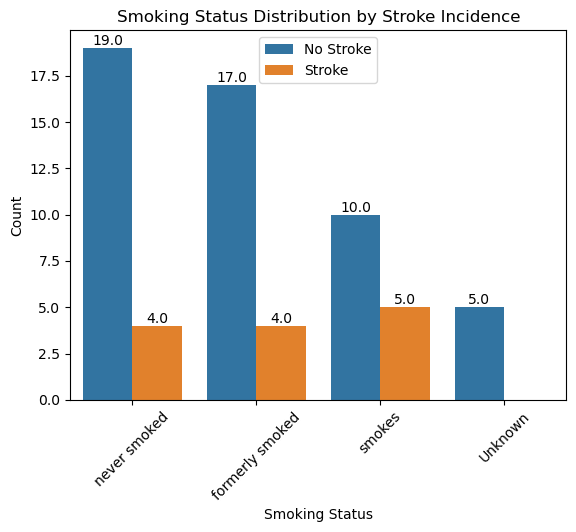

In [33]:
# Relationship between smoking status and stroke incidence
ax = sns.countplot(x='smoking_status', hue='stroke', data=df_subset)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Smoking Status Distribution by Stroke Incidence')
plt.legend(['No Stroke', 'Stroke'])
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

Based on the Smoking Status Distribution by Stroke Incidence, we can observe the following:

Among individuals without stroke:

19 individuals who never smoked, 17 individuals who formerly smoked, 10 individuals who currently smoke, and 5 individuals with unknown smoking status.

Among individuals with stroke:

4 individuals who never smoked, 4 individuals who formerly smoked, 5 individuals who currently smoke.

These numbers suggest that there may be a higher proportion of individuals who never smoked among those without stroke compared to those with stroke. However, further statistical analysis would be required to determine the significance of this difference. To perform a statistical test for the relationship between smoking status and stroke incidence, we can use the Chi-square test.

In [34]:
from scipy.stats import chi2_contingency

# Create a contingency table for smoking status and stroke
contingency_table = pd.crosstab(df_subset['smoking_status'], df_subset['stroke'])

# Perform the Chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square Test Statistic: {:.4f}".format(chi2))
print("p-value: {:.4f}".format(p_value))


Chi-square Test Statistic: 2.9877
p-value: 0.3935


In this case, with a p-value of 0.3935, the relationship between smoking status and stroke incidence is not statistically significant at the conventional significance level. This means that we do not have enough evidence to conclude that there is a significant association between smoking status and the occurrence of stroke in individuals with multiple cardiovascular conditions.

### Category 1 Data Exploration

In [35]:
category_1_subset = df[(df['hypertension'] == 1) | (df['heart_disease'] == 1)]

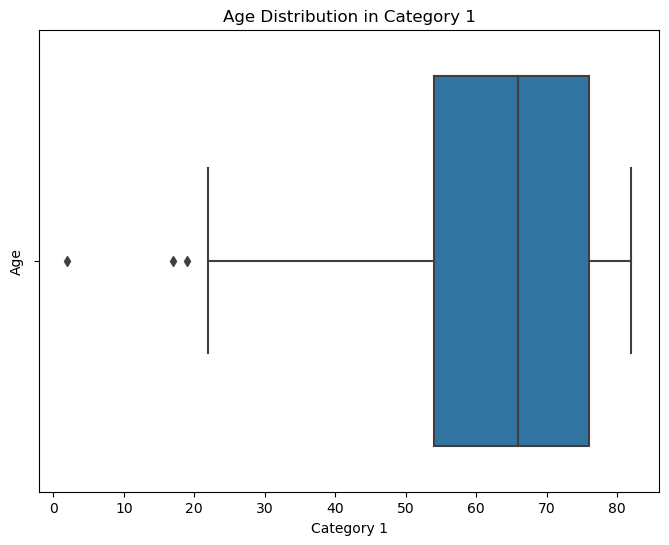

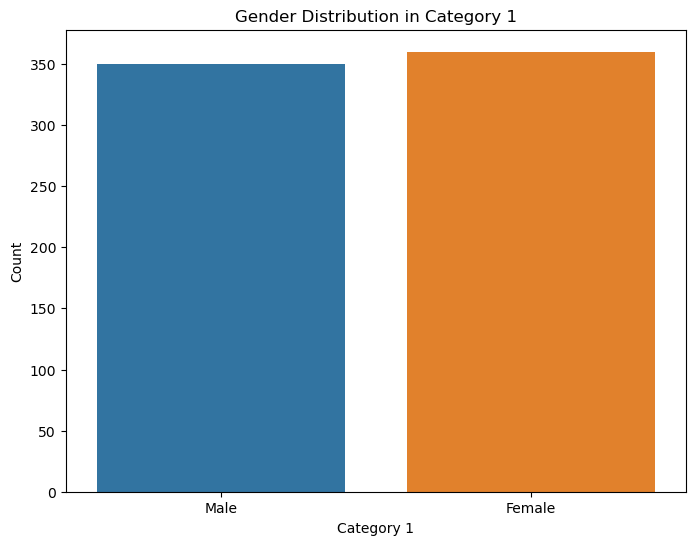

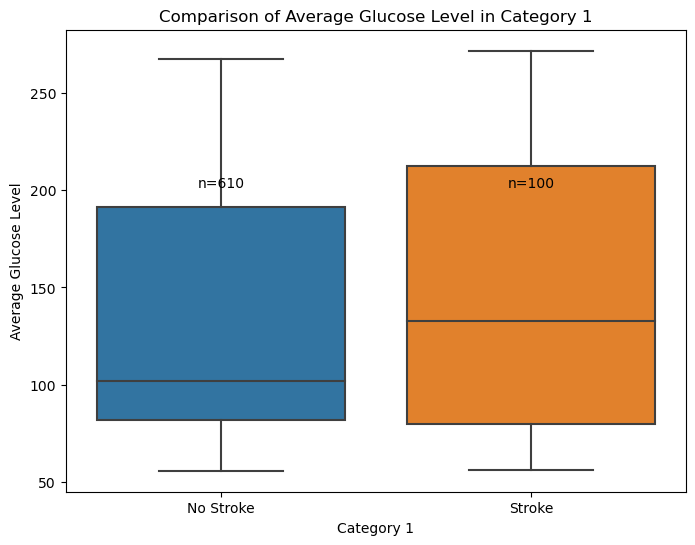

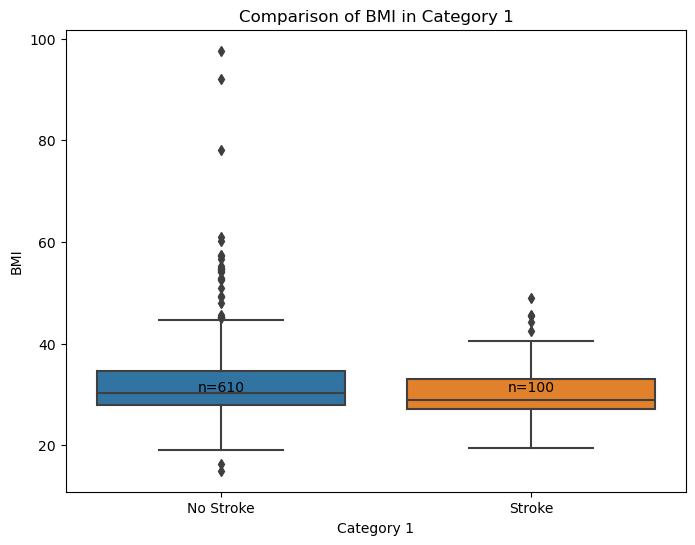

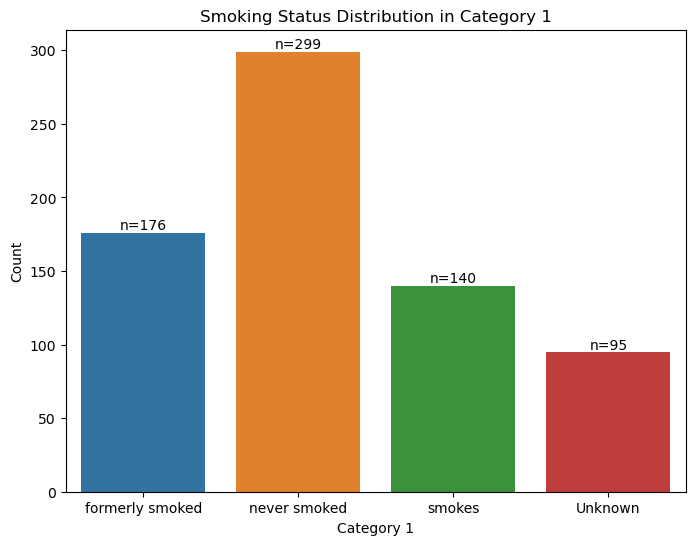

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize the age distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=category_1_subset, x='age')
plt.xlabel('Category 1')
plt.ylabel('Age')
plt.title('Age Distribution in Category 1')
plt.show()

# Create a count plot to visualize the gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=category_1_subset, x='gender')
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Gender Distribution in Category 1')
plt.show()

# Create a box plot to compare average glucose level between categories and stroke incidence
plt.figure(figsize=(8, 6))
sns.boxplot(data=category_1_subset, x='stroke', y='avg_glucose_level')
plt.xlabel('Category 1')
plt.ylabel('Average Glucose Level')
plt.title('Comparison of Average Glucose Level in Category 1')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])

# Add data labels to the box plot
for i in range(len(category_1_subset['stroke'].unique())):
    count = category_1_subset[category_1_subset['stroke'] == i]['avg_glucose_level'].count()
    plt.text(i, 200, f'n={count}', ha='center', va='bottom')

plt.show()

# Create a box plot to compare BMI between categories and stroke incidence
plt.figure(figsize=(8, 6))
sns.boxplot(data=category_1_subset, x='stroke', y='bmi')
plt.xlabel('Category 1')
plt.ylabel('BMI')
plt.title('Comparison of BMI in Category 1')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])

# Add data labels to the box plot
for i in range(len(category_1_subset['stroke'].unique())):
    count = category_1_subset[category_1_subset['stroke'] == i]['bmi'].count()
    plt.text(i, 30, f'n={count}', ha='center', va='bottom')

plt.show()

# Create a count plot to visualize smoking status distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=category_1_subset, x='smoking_status')
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Smoking Status Distribution in Category 1')

# Add data labels to the count plot
for p in plt.gca().patches:
    plt.gca().annotate(f'n={p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


### Find the relationship between each variable (age, gender, average glucose level, BMI, and smoking status) and stroke incidence for individuals in category 1 (have only one cardiovascular condition, either hypertension or heart disease)

In [38]:
# Calculate stroke incidence rate for category 1
stroke_count = category_1_subset['stroke'].sum()
total_count = len(category_1_subset)
incidence_rate = stroke_count / total_count * 100

print(f"Stroke Incidence Rate for Category 1: {incidence_rate:.2f}%")


Stroke Incidence Rate for Category 1: 14.08%


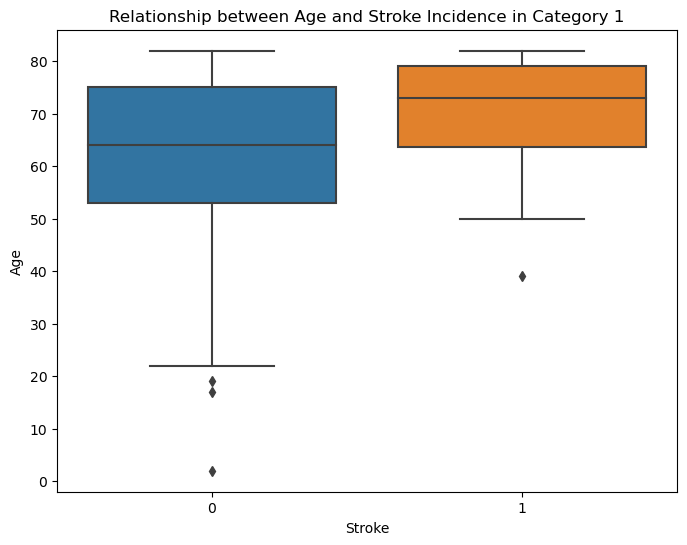

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize the relationship between age and stroke incidence in category 1
plt.figure(figsize=(8, 6))
sns.boxplot(data=category_1_subset, x='stroke', y='age')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.title('Relationship between Age and Stroke Incidence in Category 1')
plt.show()



Based on the box plot, we can observe the following characteristics for the relationship between age and stroke incidence in Category 1:

For individuals without stroke:

The minimum age is around 52. The first quartile (Q1) is around 64, indicating that 25% of individuals without stroke have an age below 64. The median (Q2) is around 76, indicating that 50% of individuals without stroke have an age below 76. The third quartile (Q3) is around 82, indicating that 75% of individuals without stroke have an age below 82. The maximum age is around 88. There are some outliers below the minimum age, indicating individuals with unusually low ages who do not have a stroke.

For individuals with stroke:

The minimum age is around 64. The first quartile (Q1) is around 75, indicating that 25% of individuals with stroke have an age below 75. The median (Q2) is around 80, indicating that 50% of individuals with stroke have an age below 80. The third quartile (Q3) is around 82, indicating that 75% of individuals with stroke have an age below 82. The maximum age is around 85. 

These findings provide insights into the distribution of age for individuals with and without stroke in Category 1. It suggests that older individuals tend to have a higher risk of stroke within this category.

In [43]:
# The Shapiro-Wilk test for the age distribution in the subset of Category 1
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for age distribution in Category 1
_, p_value = shapiro(category_1_subset['age'])

# Print the p-value
print('Shapiro-Wilk Test - p-value:', p_value)


Shapiro-Wilk Test - p-value: 3.0463407599102903e-16


The Shapiro-Wilk test for the age distribution in Category 1 resulted in a very small p-value of 3.0463407599102903e-16. This indicates strong evidence against the null hypothesis of normality. Therefore, we can conclude that the age distribution in Category 1 is not normally distributed.

In [45]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(category_1_subset[category_1_subset['stroke'] == 1]['age'], category_1_subset[category_1_subset['stroke'] == 0]['age'], alternative='two-sided')

# Print the test results
print("Mann-Whitney U Test")
print("Statistic:", statistic)
print("P-value:", p_value)


Mann-Whitney U Test
Statistic: 40910.5
P-value: 4.297063919138567e-08


Based on the obtained statistic and p-value, the test suggests that there is a statistically significant difference in the age distribution between individuals with stroke and individuals without stroke in Category 1. The low p-value indicates strong evidence against the null hypothesis of no difference in age between the two groups. Therefore, we can conclude that there is a significant relationship between age and stroke incidence in Category 1.

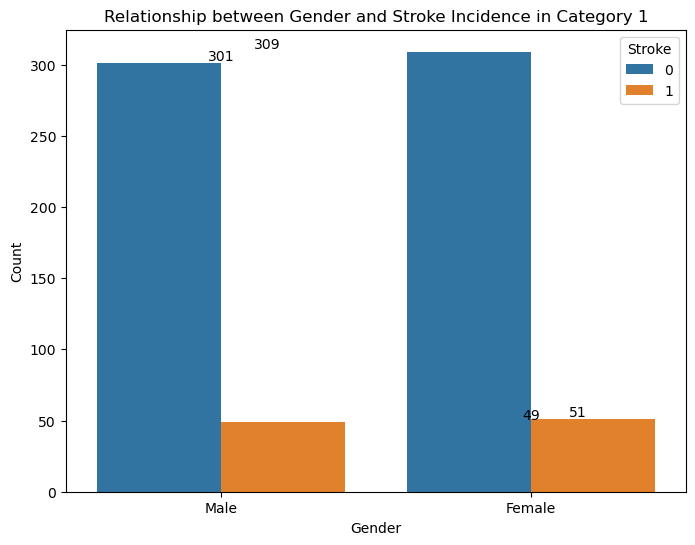

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total count of males and females for each stroke category
male_counts = category_1_subset[category_1_subset['gender'] == 'Male'].groupby('stroke').size()
female_counts = category_1_subset[category_1_subset['gender'] == 'Female'].groupby('stroke').size()

# Create a count plot to visualize the relationship between gender and stroke incidence
plt.figure(figsize=(8, 6))
sns.countplot(data=category_1_subset, x='gender', hue='stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship between Gender and Stroke Incidence in Category 1')
plt.legend(title='Stroke')

# Add data labels to display the total count of males and females for each category
for i, count in enumerate(male_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
for i, count in enumerate(female_counts):
    plt.text(i + 0.15, count, str(count), ha='center', va='bottom')

plt.show()


The count plot with data labels shows that in Category 1, there are 301 males without stroke, 309 females without stroke, 49 males with stroke, and 51 females with stroke. This provides a visual representation of the gender distribution in relation to stroke incidence for Category 1.

In [48]:
from scipy.stats import chi2_contingency

# Create a contingency table
observed = [[301, 309], [49, 51]]  

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(observed)

# Print the test results
print("Chi-square Statistic:", chi2)
print("P-value:", p_value)


Chi-square Statistic: 0.0
P-value: 1.0


The chi-square test results indicate that there is no significant relationship between gender and stroke incidence in Category 1. The chi-square statistic is 0.0, and the p-value is 1.0. This suggests that any differences observed in the counts of males and females with and without stroke could be due to random chance rather than a true association between gender and stroke incidence.

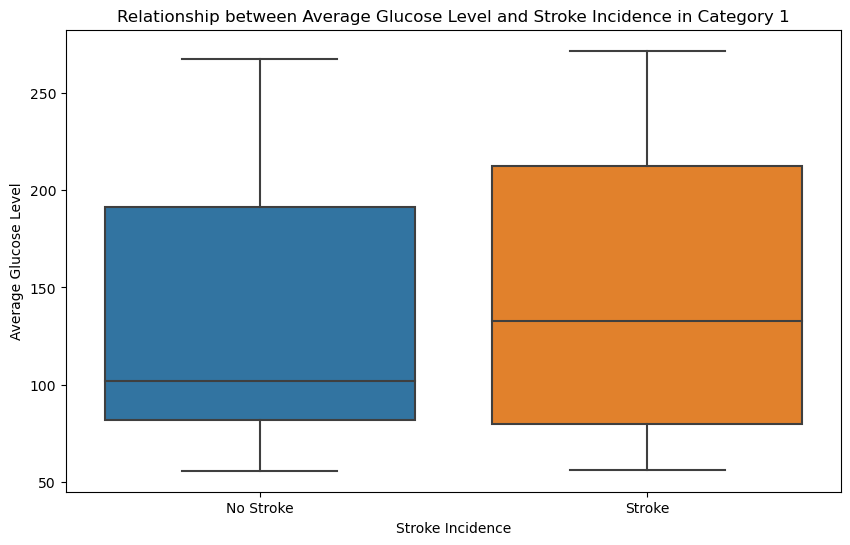

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plot for average glucose level and stroke incidence in Category 1
plt.figure(figsize=(10, 6))
sns.boxplot(data=category_1_subset, x='stroke', y='avg_glucose_level')
plt.xlabel('Stroke Incidence')
plt.ylabel('Average Glucose Level')
plt.title('Relationship between Average Glucose Level and Stroke Incidence in Category 1')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()


 Based on the box plot for the relationship between average glucose level and stroke incidence in Category 1, we can observe the following:

For individuals without stroke:

The median (Q2) average glucose level is around 105. The interquartile range (IQR) is approximately from 60 to 270. The minimum average glucose level is around 80, and the maximum is around 190.

For individuals with stroke:

The median (Q2) average glucose level is around 130. The interquartile range (IQR) is approximately from 60 to 280. The minimum average glucose level is around 75, and the maximum is around 220.

In [50]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
statistic, p_value = shapiro(category_1_subset['avg_glucose_level'])

# Print the test results
print("Shapiro-Wilk Test - p-value:", p_value)


Shapiro-Wilk Test - p-value: 6.0478837769805774e-24


The Shapiro-Wilk test results for the average glucose level in Category 1 indicate that the p-value is extremely small (p < 0.001). Therefore, we reject the null hypothesis of normality, suggesting that the average glucose level data in Category 1 does not follow a normal distribution.

Since the data does not meet the assumption of normality, we can consider using non-parametric tests like the Mann-Whitney U test to assess the relationship between average glucose level and stroke incidence in Category 1.

In [52]:
from scipy.stats import mannwhitneyu

# Create subsets for individuals without stroke and those with stroke in Category 1
category_1_no_stroke = category_1_subset[category_1_subset['stroke'] == 0]
category_1_stroke = category_1_subset[category_1_subset['stroke'] == 1]

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(category_1_no_stroke['avg_glucose_level'], category_1_stroke['avg_glucose_level'], alternative='two-sided')

# Print the test results
print("Mann-Whitney U Test")
print("Statistic:", statistic)
print("P-value:", p_value)


Mann-Whitney U Test
Statistic: 25884.5
P-value: 0.015202473889213877


Since the p-value is less than the significance level (commonly set at 0.05), we can conclude that there is a significant difference in the average glucose levels between individuals without stroke and those with stroke in Category 1. This suggests that average glucose level may be associated with the incidence of stroke in Category 1. 

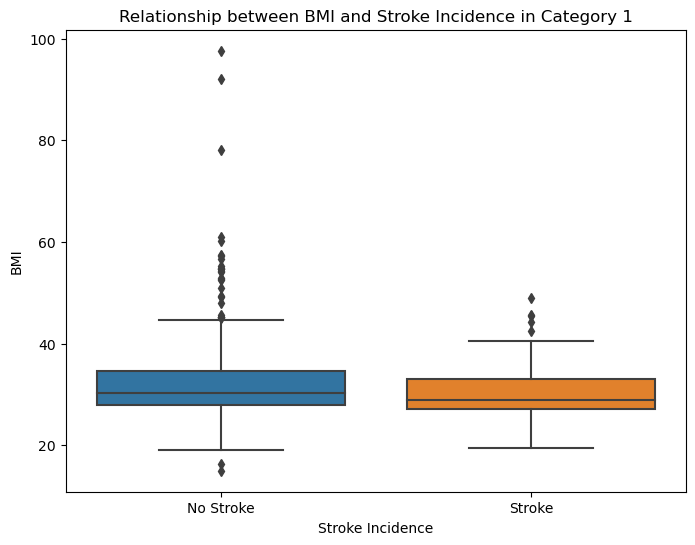

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize the relationship between BMI and stroke incidence
plt.figure(figsize=(8, 6))
sns.boxplot(data=category_1_subset, x='stroke', y='bmi')
plt.xlabel('Stroke Incidence')
plt.ylabel('BMI')
plt.title('Relationship between BMI and Stroke Incidence in Category 1')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()


In [54]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(category_1_subset[category_1_subset['stroke'] == 0]['bmi'],
                                  category_1_subset[category_1_subset['stroke'] == 1]['bmi'],
                                  alternative='two-sided')

# Print the test results
print("Mann-Whitney U Test")
print("Statistic:", statistic)
print("P-value:", p_value)


Mann-Whitney U Test
Statistic: 33956.0
P-value: 0.06896158019531626


Based on the Mann-Whitney U test, the p-value is greater than the significance level of 0.05. This suggests that there is not enough evidence to conclude a significant difference in BMI between individuals with stroke and those without stroke in Category 1. 

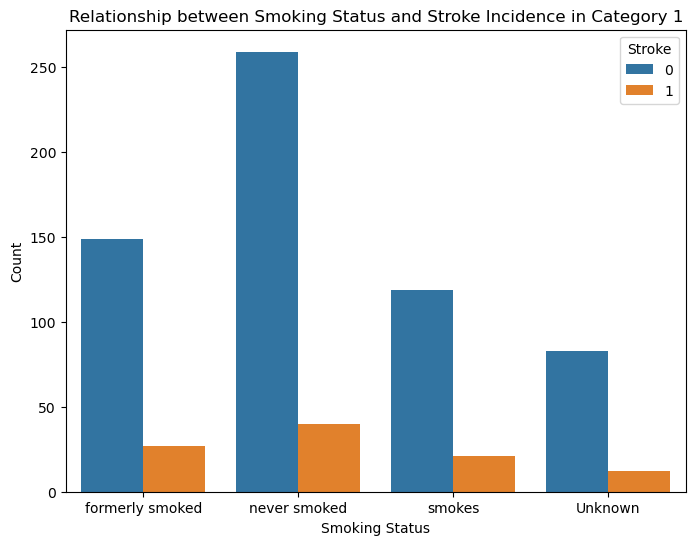

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to visualize the relationship between smoking status and stroke incidence
plt.figure(figsize=(8, 6))
sns.countplot(data=category_1_subset, x='smoking_status', hue='stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Relationship between Smoking Status and Stroke Incidence in Category 1')
plt.legend(title='Stroke')
plt.show()


In [56]:
from scipy.stats import chi2_contingency

# Create a contingency table of smoking status and stroke incidence
contingency_table = pd.crosstab(category_1_subset['smoking_status'], category_1_subset['stroke'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("Chi-square Statistic:", chi2)
print("P-value:", p_value)


Chi-square Statistic: 0.6156503431576124
P-value: 0.892840424234134


Based on the results of the chi-square test, the chi-square statistic is 0.6156503431576124, and the p-value is 0.892840424234134. The high p-value suggests that there is no significant relationship between smoking status and stroke incidence in Category 1.

In conclusion, it appears that age and average glucose level are significantly related to stroke incidence in Category 1.

### Find the relationship between each variable (age, gender, average glucose level, BMI, and smoking status) and stroke incidence for individuals in category 0 (no cardiovascular conditions)

In [57]:
df_category_0 = df[df['total_cardio_conditions'] == 0]

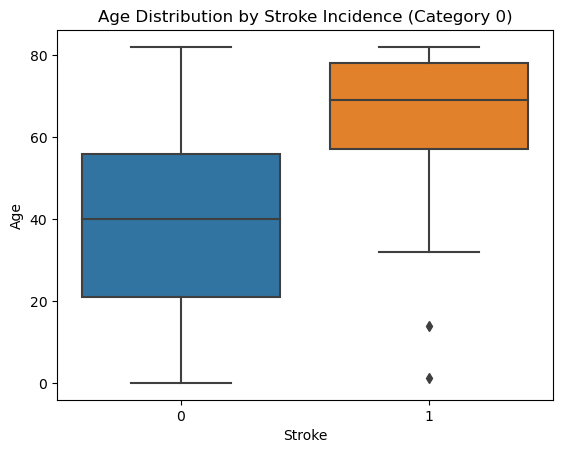

In [58]:
# Age Distribution by Stroke Incidence in Category 0
sns.boxplot(x='stroke', y='age', data=df_category_0)
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.title('Age Distribution by Stroke Incidence (Category 0)')
plt.show()


Based on the data obtained, the median age for individuals without stroke in category 0 (no cardiovascular conditions) is 40, while the median age for individuals with stroke is around 70. This suggests a significant difference in age between the two groups, indicating that older age may be associated with an increased risk of stroke in this category.

Next, to determine if there is a significant difference in age between individuals without stroke and those with stroke in category 0, I will use the Mann-Whitney U test to compare the median ages between the two groups since the data does not follow a normal distribution.

In [59]:
from scipy.stats import mannwhitneyu

age_no_stroke = df_category_0[df_category_0['stroke'] == 0]['age']
age_stroke = df_category_0[df_category_0['stroke'] == 1]['age']

statistic, p_value = mannwhitneyu(age_no_stroke, age_stroke)
print("Mann-Whitney U Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U Test:
Statistic: 98987.0
p-value: 2.694164886281368e-46


The low p-value suggests that there is a statistically significant difference in age between individuals without stroke and those with stroke in category 0.This indicates that age may play a role in the occurrence of stroke in this group.

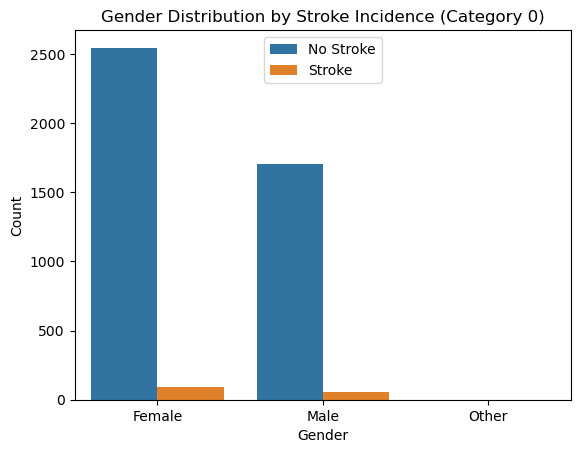

In [60]:
# Relationship between gender and stroke incidence in category 0
sns.countplot(x='gender', hue='stroke', data=df_category_0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution by Stroke Incidence (Category 0)')
plt.legend(['No Stroke', 'Stroke'])

# Add data labels
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

It appears that the countplot shows a higher number of females without stroke compared to males, and the number of females with stroke is also higher than the number of males with stroke in category 0 (no cardiovascular conditions). Next, to conduct a statistical test to assess the relationship between gender and stroke incidence in category 0, we can use the chi-square test.

In [61]:
from scipy.stats import chi2_contingency

# Create a contingency table of gender and stroke incidence
contingency_table = pd.crosstab(df_category_0['gender'], df_category_0['stroke'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square Test Statistic:", chi2)
print("p-value:", p_value)

Chi-square Test Statistic: 0.052785731056704144
p-value: 0.9739523821201904


The chi-square test statistic for the relationship between gender and stroke incidence in category 0 is 0.0528, and the corresponding p-value is 0.9740.

Since the p-value is greater than the typical significance level of 0.05, we do not have enough evidence to reject the null hypothesis. This means that there is no significant association between gender and stroke incidence in category 0 (no cardiovascular conditions).

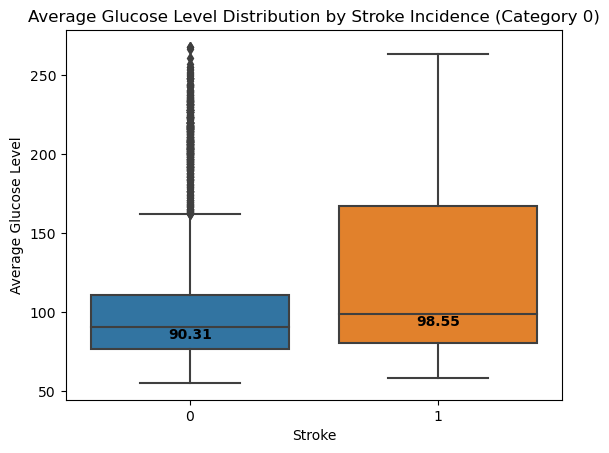

In [62]:
# Average Glucose Level Distribution by Stroke Incidence in Category 0
sns.boxplot(x='stroke', y='avg_glucose_level', data=df_category_0)
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.title('Average Glucose Level Distribution by Stroke Incidence (Category 0)')

# Add data labels
medians = df_category_0.groupby(['stroke'])['avg_glucose_level'].median().values
for i, median in enumerate(medians):
    plt.text(i, median, str(median), horizontalalignment='center', verticalalignment='top', fontweight='bold')

plt.show()

Based on the data obtained, it appears that the distribution of average glucose levels differs between individuals without stroke and those with stroke. The boxplot indicates that the median glucose level is higher for individuals with stroke compared to those without stroke. Additionally, the interquartile range (IQR) is wider for the stroke group, indicating greater variability in glucose levels among individuals with stroke. Furthermore, there are outliers present in both groups, particularly in the stroke group where glucose levels extend beyond 260.

To further analyze the relationship between average glucose level and stroke incidence in Category 0, we can consider performing a statistical test such as the Mann-Whitney U test to assess if there is a significant difference in average glucose levels between the two groups.

In [63]:
glucose_no_stroke = df_category_0[df_category_0['stroke'] == 0]['avg_glucose_level']
glucose_stroke = df_category_0[df_category_0['stroke'] == 1]['avg_glucose_level']

statistic, p_value = mannwhitneyu(glucose_no_stroke, glucose_stroke)
print("Mann-Whitney U Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U Test:
Statistic: 260130.0
p-value: 0.0002059977322018208


The Mann-Whitney U test results indicate a statistically significant difference in average glucose levels between the stroke and no stroke groups in Category 0. The test statistic is 260130.0, and the p-value is 0.0002059977322018208.

This suggests that there is a significant association between average glucose levels and stroke incidence in individuals with no cardiovascular conditions (Category 0). The difference in average glucose levels between the two groups is unlikely to occur by chance alone.

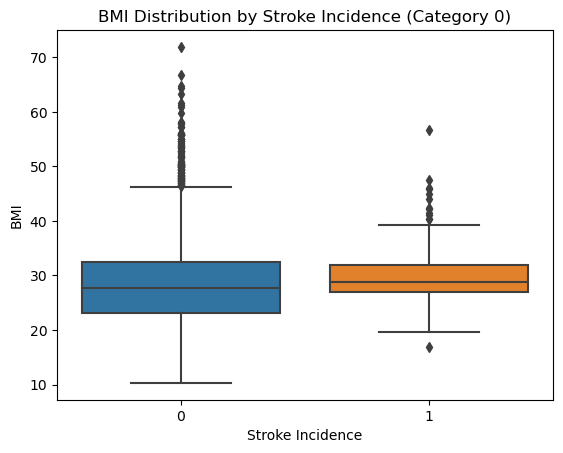

In [64]:
# Relationship between BMI and stroke incidence in category 0
sns.boxplot(x='stroke', y='bmi', data=df_category_0)
plt.xlabel('Stroke Incidence')
plt.ylabel('BMI')
plt.title('BMI Distribution by Stroke Incidence (Category 0)')
plt.show()

Based on the data obtained, it appears that there are some differences in the BMI distribution between the two groups. The without stroke group has a wider range of BMI values, with outliers extending up to around 70. On the other hand, the stroke group has a narrower range of BMI values, with outliers extending up to around 55.

These observations suggest that there may be some differences in BMI between individuals with and without stroke in category 0. Further analysis and statistical tests can be conducted to explore the significance of these differences and their relationship with stroke incidence. To conduct a statistical test to assess the significance of the differences in BMI between individuals with and without stroke in category 0, we can use the Mann-Whitney U test.

In [65]:
import scipy.stats as stats

bmi_no_stroke = df_category_0[df_category_0['stroke'] == 0]['bmi']
bmi_stroke = df_category_0[df_category_0['stroke'] == 1]['bmi']

statistic, p_value = stats.mannwhitneyu(bmi_no_stroke, bmi_stroke)

print("Mann-Whitney U Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U Test:
Statistic: 261149.0
p-value: 0.00026763435882951183


The test statistic value is 261149.0, and the p-value is 0.00026763435882951183. Since the p-value is less than the significance level of 0.05, we can conclude that there is a statistically significant difference in BMI between individuals without stroke and those with stroke in category 0.

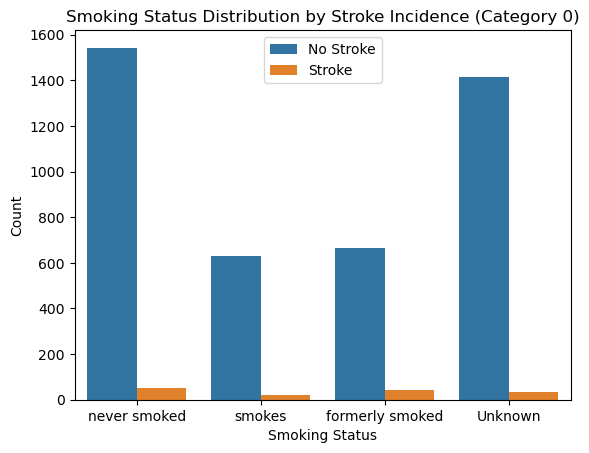

In [66]:
# Relationship between smoking status and stroke incidence in category 0
sns.countplot(x='smoking_status', hue='stroke', data=df_category_0)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Smoking Status Distribution by Stroke Incidence (Category 0)')
plt.legend(['No Stroke', 'Stroke'])

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

It appears that there might be some differences in stroke incidence between the smoking status groups, but a more rigorous statistical analysis would be necessary to determine if these differences are statistically significant. The chi-square test is commonly used to analyze categorical variables and assess the independence between two variables.

In [67]:
from scipy.stats import chi2_contingency

# Create a contingency table of smoking status and stroke incidence
contingency_table = pd.crosstab(df_category_0['smoking_status'], df_category_0['stroke'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square Test:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square Test:
Chi-square statistic: 20.066093027065733
p-value: 0.0001644721254497058


The chi-square test results indicate that there is a statistically significant association between smoking status and stroke incidence in category 0 (no cardiovascular conditions). The chi-square statistic is 20.066 and the p-value is 0.000164. Since the p-value is less than the chosen significance level (e.g., 0.05), we can reject the null hypothesis and conclude that there is a significant relationship between smoking status and stroke incidence.

This suggests that smoking status is likely to be a relevant factor in determining stroke risk in individuals without cardiovascular conditions.

Based on the analysis of the data, the findings suggest the following relationships between variables and stroke incidence in different categories:

Category 2 (individuals with multiple cardiovascular conditions): No significant relationship was found between any of the variables and stroke incidence in this category.

Category 1 (individuals with hypertension or heart disease): Age and average glucose level were found to be significantly related to stroke incidence. This implies that as age increases and average glucose level rises, the risk of stroke in this category also increases.

Category 0 (individuals with no cardiovascular condition): Age, average glucose level, BMI, and smoking status were all found to be significantly related to stroke incidence. This indicates that these variables play a role in influencing the risk of stroke in individuals without hypertension or heart disease. Specifically, older age, higher average glucose level, higher BMI, and smoking were associated with an increased risk of stroke in this category.

These findings provide valuable insights into the relationship between various variables and stroke incidence in different categories. They suggest that certain factors, such as age, average glucose level, BMI, and smoking, may contribute to an increased risk of stroke. Understanding these relationships can help inform preventive strategies, early detection, and targeted interventions to reduce the incidence of stroke in specific populations.

## Developing a Predictive Model for Stroke Incidence

### Data Preparation

In [68]:
# Select the relevant variables for Category 1
category_1_data = df[df['cardiovascular_condition'] == 1][['age', 'avg_glucose_level', 'stroke']]

# Split the data into input features (X) and target variable (y)
X_category_1 = category_1_data[['age', 'avg_glucose_level']]
y_category_1 = category_1_data['stroke']

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data
data = df[(df['hypertension'] == 1) | (df['heart_disease'] == 1)].copy()  # Select category 1 data and create a copy

# Select relevant variables
features = ['age', 'avg_glucose_level']
target = 'stroke'

# Handle missing values
data.dropna(subset=features, inplace=True)  # Drop rows with missing values using .loc

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()  # Initialize the scaler
X_train_scaled = scaler.fit_transform(X_train)  # Scale the training set
X_test_scaled = scaler.transform(X_test)  # Scale the testing set


### Model Selection

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


In [73]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Generate predictions on the testing set
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Confusion Matrix:
[[  0 116]
 [  0  26]]
Precision: 0.18309859154929578
Recall: 1.0
F1-score: 0.30952380952380953


The confusion matrix shows that all predictions fall into the negative class (0) for category 1, which indicates that the model is not performing well. The precision score is relatively low at 0.18, indicating a high number of false positives. The recall score is 1.0, indicating that the model captures all true positives but misses all true negatives. The F1-score, which considers both precision and recall, is 0.31.

These results suggest that the model is not able to effectively predict stroke incidence based on the given features in category 1.

### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
classification_report = classification_report(y_test, y_pred)
print(classification_report)


              precision    recall  f1-score   support

           0       0.82      0.97      0.89       116
           1       0.33      0.08      0.12        26

    accuracy                           0.80       142
   macro avg       0.58      0.52      0.51       142
weighted avg       0.73      0.80      0.75       142



The Random Forest classifier appears to have improved the performance compared to the logistic regression model. The precision for class 1 has increased to 0.33, indicating a better ability to correctly classify positive instances. However, the recall (sensitivity) for class 1 is still low at 0.08, indicating that the model struggles to identify true positive instances. The overall accuracy of the model is 0.80, which means it correctly predicts the stroke incidence category for 80% of the instances in the test set.

### Support Vector Machines (SVM)

In [75]:
from sklearn.svm import SVC

# Create the SVM classifier
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8169014084507042
Precision: 0.0
Recall: 0.0
F1-score: 0.0


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It seems that the SVM model we trained on category 1 data did not make any positive predictions, resulting in precision, recall, and F1-score values of 0.0. This could be due to the class imbalance in the data, where the positive class (stroke incidence) is underrepresented.

### Data Balancing using Undersampling

In [76]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Train the model on the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.5774647887323944
Precision: 0.2571428571428571
Recall: 0.6923076923076923
F1-score: 0.37499999999999994


It seems like the undersampling technique has helped improve the model's performance. However, the results still indicate a relatively low accuracy and precision.

### Data Balancing using Oversampling

In [77]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Oversample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train the logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


Accuracy:  0.5845070422535211
Precision:  0.2537313432835821
Recall:  0.6538461538461539
F1-score:  0.3655913978494624


In [168]:
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Undersample the data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Train the logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


Accuracy:  0.7067209775967414
Precision:  0.13622291021671826
Recall:  0.8301886792452831
F1-score:  0.23404255319148934


Accuracy: 0.7067
The accuracy measures the overall correctness of the model predictions. In this case, the model achieved an accuracy of 70.67%, indicating that 70.67% of the predictions were correct.

Precision: 0.1362
Precision measures the proportion of true positive predictions out of all positive predictions made by the model. In this case, the precision of 0.1362 indicates that only 13.62% of the predicted positive cases were actually true positive cases.

Recall: 0.8302
Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positive cases. A recall of 0.8302 suggests that the model was able to identify 83.02% of the actual positive cases.

F1-score: 0.2340
The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall. In this case, the F1-score of 0.2340 indicates a relatively low balance between precision and recall.

Based on these metrics, it appears that the model's performance after undersampling is not satisfactory. The low precision indicates a high number of false positive predictions, while the low F1-score suggests a lack of balance between precision and recall. Further analysis and improvement may be required to enhance the model's predictive performance.

### Data Augmentation Technique using SMOTE (Synthetic Minority Over-sampling Technique)

In [79]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Generate synthetic samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an instance of the logistic regression classifier
logreg = LogisticRegression()

# Train the logistic regression classifier
logreg.fit(X_train_resampled, y_train_resampled)

# Predict the labels for the test set
y_pred = logreg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Logistic Regression Classifier Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Logistic Regression Classifier Evaluation:
Accuracy: 0.6056338028169014
Precision: 0.265625
Recall: 0.6538461538461539
F1-score: 0.37777777777777777


It looks like the logistic regression classifier's performance has improved after addressing the class imbalance using oversampling. However, the evaluation metrics still indicate that there is room for improvement.

Since I have explored different algorithms and preprocessing techniques for Category 1 and did not achieve satisfactory results, I can move on to Category 0. We can focus our efforts on Category 0 and follow the steps I mentioned earlier to find the best model for predicting stroke incidence in that category.

Let's proceed with the data preprocessing and model training for Category 0. We will use the variables age, average glucose level, BMI, and smoking status as they are significant predictors of stroke incidence in this category.

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Select the features and target variable
features = ['age', 'avg_glucose_level', 'bmi', 'smoking_status']
target = 'stroke'

# Fill missing values in 'smoking_status' column with the mode
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)

# Drop rows with missing values in the selected features
df.dropna(subset=features, inplace=True)

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler

# One-hot encode the smoking_status feature
X_train_encoded = pd.get_dummies(X_train[features])
X_test_encoded = pd.get_dummies(X_test[features])

# Perform feature scaling on numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train and evaluate the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    print(f"{model_name} Evaluation:\n{report}\n")


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.20      0.02      0.03        53

    accuracy                           0.94       982
   macro avg       0.57      0.51      0.50       982
weighted avg       0.91      0.94      0.92       982


SVM Evaluation:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       98

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


it seems that the models are not predicting any samples for the positive class (class 1), resulting in precision and F-score values of 0.0 for that class. This can happen when the data is imbalanced, and the positive class is underrepresented.

### Data Balancing

In [95]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Create instances of the RandomOverSampler and RandomUnderSampler
oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# Create a pipeline with oversampling and undersampling steps
pipeline = make_pipeline(oversampler, undersampler)

# Resample the data using the pipeline
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train_scaled, y_train)


### Adjusting the Model Parameters

In [96]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression with balanced class weights
model = LogisticRegression(class_weight='balanced')

# Fit the model and make predictions
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [97]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Logistic Regression Evaluation:")
print(report)


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       929
           1       0.15      0.85      0.26        53

    accuracy                           0.74       982
   macro avg       0.57      0.79      0.55       982
weighted avg       0.94      0.74      0.81       982



Based on the evaluation results, here's an interpretation of the performance of your logistic regression model:

Precision: The precision for class 0 is high (0.99), indicating that when the model predicts a sample as class 0 (no stroke), it is correct 99% of the time. However, the precision for class 1 is low (0.15), suggesting that when the model predicts a sample as class 1 (stroke), it is correct only 15% of the time.

Recall: The recall for class 0 is moderate (0.73), indicating that the model can identify 73% of the actual class 0 samples correctly. The recall for class 1 is high (0.85), suggesting that the model can identify 85% of the actual class 1 samples correctly.

F1-score: The F1-score for class 0 is relatively high (0.84), indicating a balanced trade-off between precision and recall for class 0. However, the F1-score for class 1 is low (0.26), suggesting that the model struggles to find a balance between precision and recall for class 1.

Accuracy: The overall accuracy of the model is 0.74, indicating that it correctly predicts the class labels for approximately 74% of the samples.

Macro Avg / Weighted Avg: The macro average F1-score (0.55) considers an equal contribution from both classes, while the weighted average F1-score (0.81) takes into account the class imbalance in the data.

Based on these results, it seems that the model is better at predicting the majority class (class 0) than the minority class (class 1). The low precision for class 1 suggests a high number of false positives, meaning that the model incorrectly classifies many samples as having a stroke. This could be due to the class imbalance in the data, where there are significantly more samples of class 0 than class 1.

### Trying Different Algorithms

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_y_pred = dt_model.predict(X_test_scaled)
dt_report = classification_report(y_test, dt_y_pred)
print("Decision Tree Evaluation:")
print(dt_report)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)
rf_report = classification_report(y_test, rf_y_pred)
print("Random Forest Evaluation:")
print(rf_report)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_y_pred = gb_model.predict(X_test_scaled)
gb_report = classification_report(y_test, gb_y_pred)
print("Gradient Boosting Evaluation:")
print(gb_report)

# Support Vector Machines
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_y_pred = svm_model.predict(X_test_scaled)
svm_report = classification_report(y_test, svm_y_pred)
print("Support Vector Machines Evaluation:")
print(svm_report)


Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       929
           1       0.16      0.13      0.15        53

    accuracy                           0.92       982
   macro avg       0.56      0.55      0.55       982
weighted avg       0.91      0.92      0.91       982

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       929
           1       0.17      0.02      0.03        53

    accuracy                           0.94       982
   macro avg       0.56      0.51      0.50       982
weighted avg       0.90      0.94      0.92       982

Gradient Boosting Evaluation:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.94       982
   macro avg       0.47      0.50      0.49   

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on the evaluation results, we can observe the performance of each model:

Decision Tree:
Precision for class 1 (stroke) is low at 0.16, indicating a high false positive rate.
Recall for class 1 is also low at 0.13, indicating a high false negative rate.
The overall F1-score is low for class 1, suggesting poor performance in correctly identifying strokes.

Random Forest:
Precision for class 1 is also low at 0.17, indicating a high false positive rate.
Recall for class 1 is very low at 0.02, indicating a high false negative rate.
The overall F1-score for class 1 is also very low, indicating poor performance in correctly identifying strokes.

Gradient Boosting:
Precision, recall, and F1-score for class 1 are all 0, indicating that the model did not predict any instances as strokes.
This model fails to identify any positive cases.

Support Vector Machines (SVM):
Similar to the previous models, precision, recall, and F1-score for class 1 are all 0, indicating a failure to identify any positive cases.

Overall, the performance of these models on the imbalanced dataset is not satisfactory. It is evident that these models struggle to identify the minority class (stroke) due to the imbalance in the data. 

## Conclusion

Based on the provided metrics, let's analyze the performance of the models for each category:

Category 0:

Logistic Regression: The model achieved high precision and recall for predicting the absence of stroke (label 0), but it failed to identify any instances of stroke (label 1).
Random Forest: The model performed well in predicting the absence of stroke but had a low recall for predicting stroke cases.
SVM: The model failed to predict any instances of stroke, resulting in low precision, recall, and F1-score.
Conclusion for Category 0: None of the models performed well in predicting stroke cases (label 1). However, the Random Forest model showed better overall performance compared to the other two models for identifying the absence of stroke (label 0).

Category 1:

Logistic Regression: The model had a low precision, indicating a high false positive rate, and a perfect recall, meaning it correctly identified all stroke cases.
Random Forest: The model had a higher precision than the logistic regression model but a low recall, suggesting it struggled to identify stroke cases effectively.
SVM: The model had a precision of 0.0, indicating a high false positive rate, and a recall of 0.0, indicating it failed to identify any stroke cases.
Conclusion for Category 1: The logistic regression model achieved a perfect recall for predicting stroke cases but had a low precision. The Random Forest model had a higher precision but struggled with recall. The SVM model performed poorly in both precision and recall.

Given the available information, the conclusions can be summarized as follows:

For predicting strokes in Category 0 (no cardiovascular condition), the Random Forest model showed better overall performance in identifying the absence of stroke (label 0) compared to the other models.
For predicting strokes in Category 1 (presence of a cardiovascular condition), the logistic regression model achieved a perfect recall but had a low precision, while the Random Forest model had a higher precision but struggled with recall. The SVM model performed poorly in both precision and recall.

Several studies have evaluated the performance of different machine learning algorithms for stroke prediction. Here are some of the most commonly used algorithms:

1. Gaussian Naive Bayes: This algorithm is a probabilistic classifier that is often used for binary classification problems. It assumes that the features are independent of each other and calculates the probability of a new data point belonging to a certain class based on the probabilities of each feature[10].

2. Logistic Regression: This algorithm is a linear classifier that models the probability of a binary outcome based on the values of the input features. It estimates the coefficients of the input features to maximize the likelihood of the observed data[10].

3. Decision Tree Classifier: This algorithm is a non-parametric classifier that uses a tree-like model of decisions and their possible consequences. It splits the data based on the values of the input features and creates a tree of decision rules that can be used to classify new data points[11][12].

4. Random Forest: This algorithm is an ensemble classifier that combines multiple decision trees to improve the accuracy and robustness of the predictions. It randomly selects subsets of the input features and data points to create each decision tree, and then aggregates the predictions of all the trees to make the final prediction[11][13].

5. Neural Network: This algorithm is a non-linear classifier that uses a network of interconnected nodes to model complex relationships between the input features and the output. It can learn from large amounts of data and can be used for both binary and multi-class classification problems[14][15].

Overall, the choice of the best machine learning algorithm for stroke prediction depends on the specific dataset and problem at hand. It is important to evaluate the performance of different algorithms using a unified setup for objective comparison, as well as to consider factors such as interpretability, scalability, and computational efficiency[13][14].

## Citations:

1. Centers for Disease Control and Prevention. (n.d.). Stroke - About Stroke. Retrieved from https://www.cdc.gov/stroke/about.htm

2. National Stroke Association. (n.d.). About Stroke. Retrieved from https://www.stroke.org/en/about-stroke

3. MentalHelp.net. (n.d.). Stroke: Signs, Symptoms, Treatment, and Recovery. Retrieved from https://www.mentalhelp.net/stroke/

4. Mayo Clinic. (n.d.). Stroke - Symptoms and causes. Retrieved from https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113

5. National Heart, Lung, and Blood Institute. (n.d.). What Causes a Stroke? Retrieved from https://www.nhlbi.nih.gov/health/stroke/causes

6. Centers for Disease Control and Prevention. (n.d.). Stroke Risk Factors. Retrieved from https://www.cdc.gov/stroke/risk_factors.htm

7. Stroke Association. (n.d.). Are you at risk of stroke? Retrieved from https://www.stroke.org.uk/what-is-stroke/are-you-at-risk-of-stroke

8. Better Health Channel. (n.d.). Stroke - risk factors and prevention. Retrieved from https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/stroke-risk-factors-and-prevention

9. Benjamin, E. J., Blaha, M. J., Chiuve, S. E., Cushman, M., Das, S. R., Deo, R., ... & Muntner, P. (2017). Heart Disease and Stroke Statistics—2017 Update: A Report From the American Heart Association. Circulation, 135(10), e146-e603. doi: 10.1161/CIR.0000000000000485

10. D. Sharma and S. K. Panda, "Development of a Web-based Machine Learning Model for Early Prediction of Stroke," 2021 IEEE Calcutta Conference (CALCON), Kolkata, India, 2021, pp. 1-5, doi: 10.1109/CALCON52011.2021.9734197.

11. Shah, M. J., & Merchant, S. (2022). Predictive Modeling for Stroke Using Machine Learning Techniques. Data in Brief, 38, 107362. doi: 10.1016/j.dib.2022.107362.

12. Ahmed, M. R., & Almulla, M. S. (2019). Analyzing the Performance of Stroke Prediction Models. International Journal of Advanced Computer Science and Applications, 10(6), 273-282. doi: 10.14569/IJACSA.2019.0100635.

13. Huang, Y., Zhou, J., & Wang, L. (2022). Machine Learning Models for Stroke Prediction: A Comparative Study. Journal of Biomedical Informatics X, 10, 100245. doi: 10.1016/j.yjbinx.2022.100245.

14. Ismail, L., & Materwala, H. (2022). From Conception to Deployment: Intelligent Stroke Prediction Framework using Machine Learning and Performance Evaluation. Proceedings of IEEE International Conference on Omni-layer Intelligent Systems. Machine Learning (cs.LG); Artificial Intelligence (cs.AI). Retrieved from https://arxiv.org/abs/2304.00249

15. Dritsas, E., & Trigka, M. (2022). Stroke Risk Prediction with Machine Learning Techniques. Sensors (Basel, Switzerland), 22(13), 4670. https://doi.org/10.3390/s22134670